## Hash Functions
The objective of this test is to find how effective these hash functions are and measure load factor and collision ratio. The simplest hashing will be adding up their ASCII value to get cummulative sum and then modula with table size. But this method causes lot of collision due to simple additions. Plynomial hash function uses a polynomial coefficient which will be increasing power of a prime co-efficient. The prime number should also form an abellian group i.e, it should produce all the numbers in the range 0 to _prime number_.

### Polynomial Hash
Let us start by representing a word using its ASCII value, so consider the word as $a_0, a_1,...,a_{n-1}$. and the hash polynomial as $p_0 \cdot X^0 + p_1 \cdot X^1 + ... + p_{n-1} \cdot X^{n-1}$. To compute polynomial hash index, we use the formula $$hash index = \sum\limits_{i=0}^{n-1} p_i \cdot X^i \cdot a_i$$ 
Hash polynomial should be irreducible. Irreducible polynomial cannot be factored into polynomials of lower degree, also with integer coefficients. irreducibility depends on the field or ring to which the coefficients are considered to belong. This source describes a few irreducible polynomials http://www.hpl.hp.com/techreports/98/HPL-98-135.pdf?jumpid=reg_R1002_USEN

### Non-cryptographic Hash Functions
#### Murmur hash
Murmur is a family of general purpose hashing function (Non-cryptographic). The name comes from two basic operations Multiplication(MU) and Rotate(R). We use shift and XOR operations to perform the multiplications and rotate operations. Algorithm is taken from https://en.wikipedia.org/wiki/MurmurHash . Python and Julia has implementaions available. Murmur has good distribution, collision resistance, simple to implement and extremely fast in Intel architecture. it has good tradeoff between hardware usage and hash quality.
#### xxHash
xxHash is general purpose hashing function. xxHash has high Memory bandwidth usage and works closely to the speed of RAM. Open source implementaion can be found here https://code.google.com/p/xxhash/.

Detailed comparision of hash functions http://programmers.stackexchange.com/questions/49550/which-hashing-algorithm-is-best-for-uniqueness-and-speed

### Performance of Hash functions

#### Test machine
- Workstation (Thinkpad L450)
    - CPU: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz
    - Memory: 4GB RAM @ 1600MHz with ECC enabled
    - OS: Ubuntu 14.04.1, kernel version 3.19.0-42-generic, x86_64 GNU/Linux
    
- Compute node (Triton - GPU001)
    - CPU: Intel(R) Xeon(R) CPU X5650  @ 2.67GHz
    - Memory: 24GB RAM @ ----MHz with ECC enabled
    - OS: Linux, kernel version  2.6.32-573.3.1.el6.x86_64, x86_64 GNU/Linux

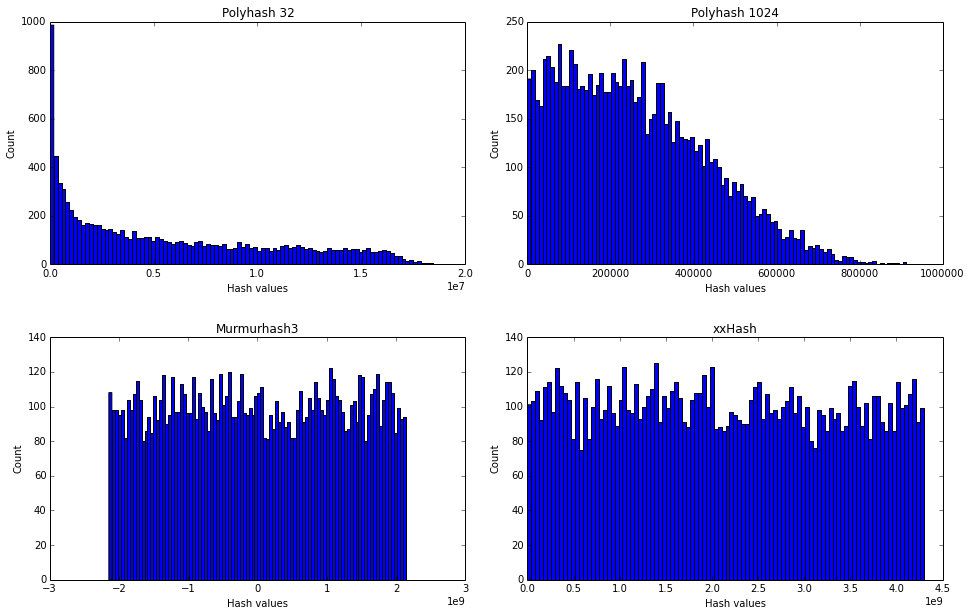

In [25]:
hashval_32 = []
hashval_1024 = []
hashval_murmur = []
hashval_xxhash = []
for i in range(0,10000):
    _len = random.randint(1,1024)
    _str = ''.join( [chr(random.randint(0,255)) for i in xrange(0,_len)])
    hashval_32.append(polyhash32(_str, 1234))
    hashval_1024.append(polyhash1024(_str, 1234))
    hashval_murmur.append(mmh3.hash(_str, 1234))
    hashval_xxhash.append(xxhash.xxh32(_str,seed=1234).intdigest())

rcParams['figure.figsize'] = 16, 10
fig = plt.figure()
gs = gridspec.GridSpec(2, 2,width_ratios=[1,1])
gs.update(wspace=0.15, hspace=0.3)
plot_collision(fig, gs, hashval_32, hashval_1024, hashval_murmur, hashval_xxhash)

Above plots describe hashing done on 10000 different input data with the same seed. _Polynomial hash functions_ exibit high collision even for small input size compared to _Murmur_ and _xxHash_. 

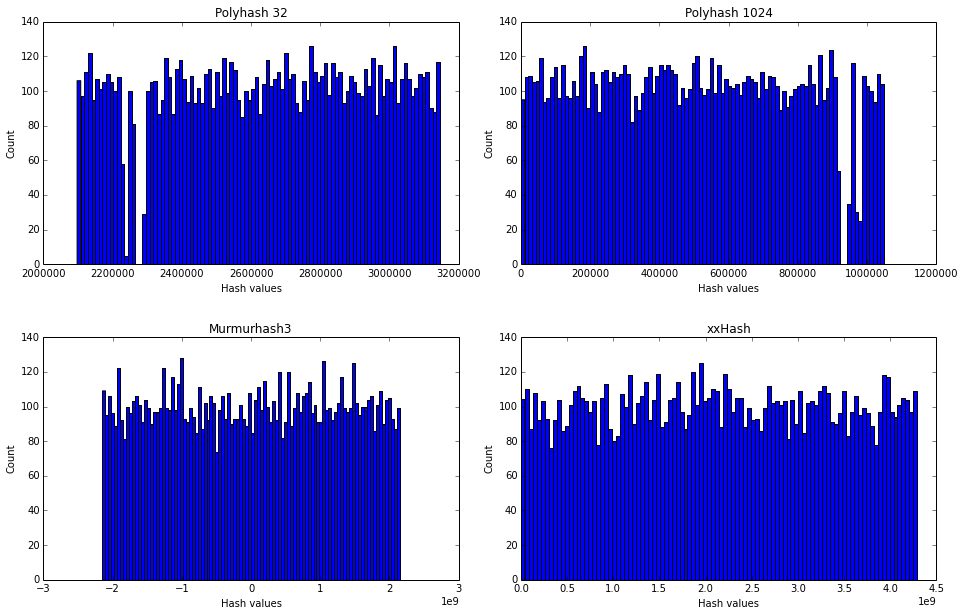

In [70]:
hashval_32 = []
hashval_1024 = []
hashval_murmur = []
hashval_xxhash = []
_str = ''.join( [chr(random.randint(0,255)) for i in xrange(0,random.randint(1,1024))])
for i in range(0,10000):
    _seed = random.randint(1,1000000)
    hashval_32.append(polyhash32(_str, _seed))
    hashval_1024.append(polyhash1024(_str, _seed))
    hashval_murmur.append(mmh3.hash(_str, _seed))
    hashval_xxhash.append(xxhash.xxh32(_str,seed=_seed).intdigest())

rcParams['figure.figsize'] = 16, 10
fig = plt.figure()
gs = gridspec.GridSpec(2, 2,width_ratios=[1,1])
gs.update(wspace=0.15, hspace=0.3)
plot_collision(fig, gs, hashval_32, hashval_1024, hashval_murmur, hashval_xxhash)


Hashing same data with different seed. All the hash functions exibit relatively less collisions.

### Time Complexity

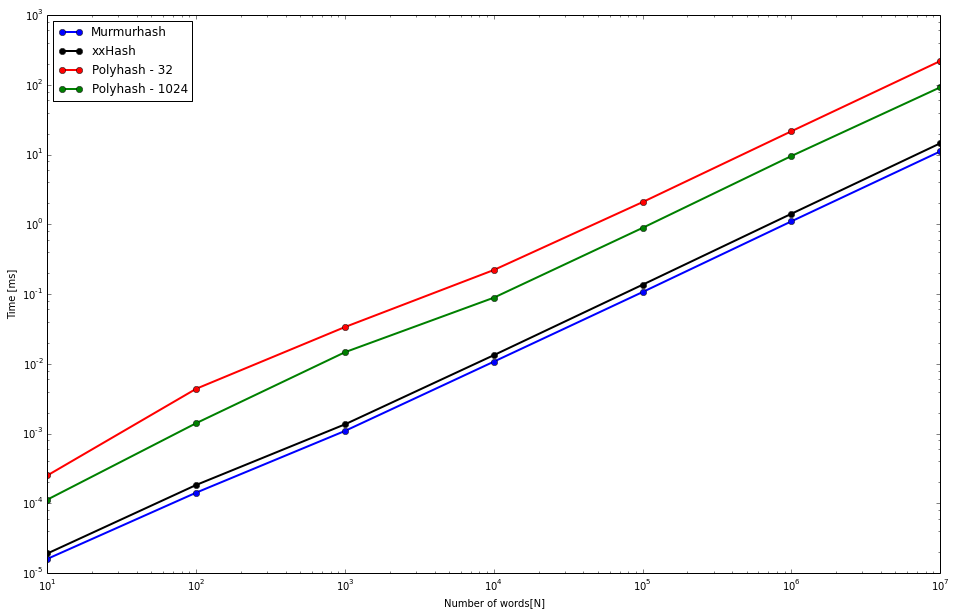

In [31]:
_file = "../data/twitter_words.txt"
_seed = 128
plot_runtime(_file, _seed, 8)

Performance of a hash function is the time taken to hash. Performance of Murmurhash and xxHash functions doesnot have much of difference, Murmurhash performs slightly better (no great performance change). Its surprising that the polyhash is taking more time than Murmurhash and xxHash which have signficantly less collision. With more careful implementation polyhash runtime can even be reduced. We are using the default library implementation of Murmur and xxHash function, whose implementations are carefully engineered.

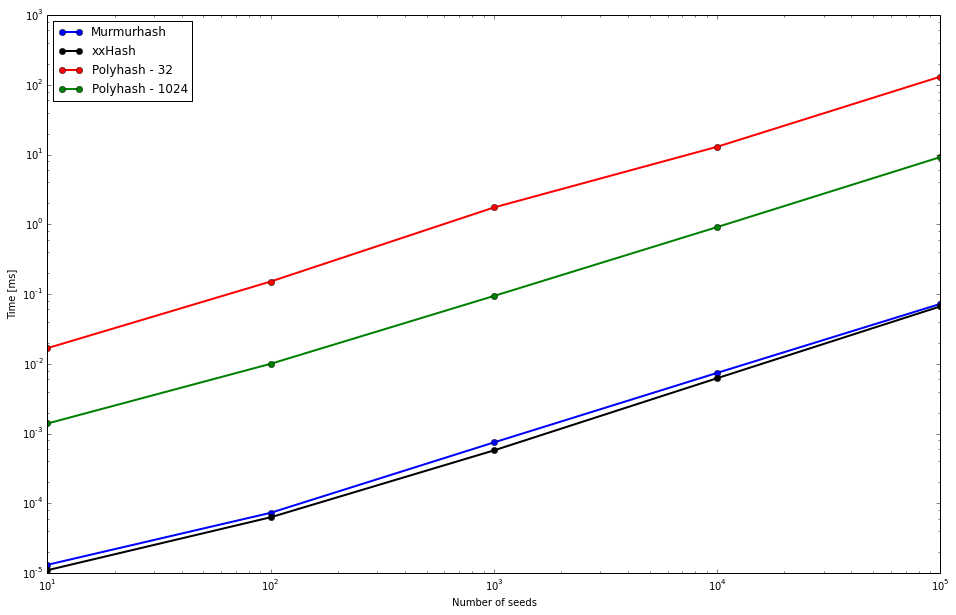

In [79]:
_str = ''.join( [chr(random.randint(0,255)) for i in xrange(0,1024)])
plot_runtime2(_str, 6)

Plots show the performance of hash functions with same data and different seeds. data of word is of size 1024 characters and seeds are randomly generated. In this case xxHash slightly outperforms Murmurhash with large number of seeds.

## Flajolet Martin Algorithm

## Alon Matias Szegedy

In [ ]:
def ams(_file, N, M):
    _dict = collections.OrderedDict()
    lines = list(islice(open(_file), N))
    val = 0
    while len(_dict) < M:
        line = random.choice(lines)
        if not re.match(r'^\s*$', line):
            if line not in _dict:
                _dict[line] = 0
    for line in lines:
        if not re.match(r'^\s*$', line):
            if line in _dict:
                _dict[line] += 1
    #return sum(map(lambda x: N*(2*x-1), _dict.values()))/M
    return np.array(_dict.values())

In [ ]:
ams("../data/twitter_words.txt", 100000, 30000) 

In [ ]:
F0F2_exact("../data/twitter_words.txt", 100000)

In [24]:
exact = collections.defaultdict(int);
F2_dict = collections.defaultdict(list)

for N in [ pow(10,j) for j in range(3,6)]:
    f0, f2 = F0F2_exact("../data/twitter_words.txt", N)
    C = ams("../data/twitter_words.txt", N, f0)
    exact[N] = f2
    for M in [ int(f0 * j) for j in np.arange(0.05, 1.05, 0.05)]: 
        F2_dict[N].append(sum(map(lambda x : N*(2*x-1), C[0:M]))/M)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
for key, value in F2_dict.iteritems():
    ret = ax.scatter([int(x=key) for i in range(0,len(value))], value, alpha=0.5)
X=[]
Y=[]
for key, value in sorted(exact.items()):
    X.append(key)
    Y.append(value)
ret = ax.plot(X, Y, marker='o', mew=1, linewidth=2, color='green')

X=[]
Y=[]
for key, value in sorted(F2_dict.items()):
    X.append(key)
    Y.append(sum(value)/len(value))
ret = ax.plot(X, Y, marker='o', color='red', linewidth=2)

NameError: name 'F0F2_exact' is not defined

In [ ]:
def shittyhash(_str):
    ret = polyhash32(_str,1234)
    if ret%2:
        return -1
    else:
        return 1

In [ ]:
def ams2(_file, N, M):
    lines = list(islice(open(_file), N))
    for line in lines:
        if not re.match(r'^\s*$', line):
            val = shittyhash(line)
            

In [ ]:
ams2("../data/twitter_words.txt", 10, 10)

## Appendix

### Includes

In [4]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec

from itertools import islice
import collections
import re

import mmh3
import xxhash
import time

### Implementation of Polynomial Hash functions

In [17]:
#X^32 = X^0 + X^2 + X^3 + X^7
poly_32 = np.zeros(32)
poly_32[0] = 1
poly_32[2] = 1
poly_32[3] = 1 
poly_32[7] = 1

#X^1024 = X^8 + X^7 + X^4 + X^0
poly_1024 = np.zeros(1024)
poly_1024[0] = 1
poly_1024[4] = 1
poly_1024[7] = 1
poly_1024[8] = 1

def polyhash32(_str, seed):
    _sum = 0
    hashInd = 0
    for index, item in enumerate(_str):
        _sum += ord(item)
        hashInd += (ord(item)  * poly_32[index%32])
    return int((int((np.mod(hashInd, _sum) * len(_str)))^seed) % (1<<32))

def polyhash1024(_str, seed):
    _sum = 0
    hashInd = 0
    _len = len(_str)
    for index, item in enumerate(_str):
        _sum += (ord(item))
    if(_len >= 9):
        hashInd = ((ord(_str[8]) * poly_1024[8]) + (ord(_str[7]) * poly_1024[7]) + 
                   (ord(_str[4] * poly_1024[4])) + (ord(_str[0] * poly_1024[0])))
    if(_len < 9 and _len >= 8):
        hashInd = ((ord(_str[7]) * poly_1024[7]) + (ord(_str[4] * poly_1024[4])) +
                   (ord(_str[0] * poly_1024[0])))
    if(_len < 8 and _len >=5):
        hashInd = ((ord(_str[4] * poly_1024[4])) + (ord(_str[0] * poly_1024[0]))) 
    if(_len < 5):
        hashInd = (ord(_str[0] * poly_1024[0]))
    return int((int((np.mod(hashInd, _sum) * len(_str)))^seed) % (1<<32))

In [24]:
polyhash1024("abcd", 123)

511

### Collision

In [6]:
def plot_collision(ax, gs, hashval_32, hashval_1024, hashval_murmur, hashval_xxhash):

    ax = fig.add_subplot(gs[0])
    ax.set_title("Polyhash 32")
    ax.set_xlabel("Hash values")
    ax.set_ylabel("Count")
    (n, bins, patches) = ax.hist(hashval_32, bins=100)

    ax = fig.add_subplot(gs[1])
    ax.set_title("Polyhash 1024")
    ax.set_xlabel("Hash values")
    ax.set_ylabel("Count")
    (n, bins, patches) = ax.hist(hashval_1024, bins=100)

    ax = fig.add_subplot(gs[2])
    ax.set_title("Murmurhash3")
    ax.set_xlabel("Hash values")
    ax.set_ylabel("Count")
    (n, bins, patches) = ax.hist(hashval_murmur, bins=100)

    ax = fig.add_subplot(gs[3])
    ax.set_title("xxHash")
    ax.set_xlabel("Hash values")
    ax.set_ylabel("Count")
    (n, bins, patches) = ax.hist(hashval_xxhash, bins=100)

### Test code for hash functions

In [67]:
def test_polyhash32(lines, _seed):
    start = time.time()
    for line in lines:
        if not re.match(r'^\s*$', line):
            polyhash32(line, _seed)
    return (time.time() - start)
            
def test_polyhash1024(lines, _seed):
    start = time.time()
    for line in lines:
        if not re.match(r'^\s*$', line):
            polyhash1024(line, _seed)
    return (time.time() - start)
            
def test_murmur(lines, _seed):
    start = time.time()
    for line in lines:
        if not re.match(r'^\s*$', line):
            mmh3.hash(line, _seed)
    return (time.time() - start)
            
def test_xxHash(lines, _seed):
    start = time.time()
    for line in lines:
        if not re.match(r'^\s*$', line):
            xxhash.xxh32(line, seed=_seed).intdigest()
    return (time.time() - start)

In [29]:
def plot_runtime(_file, _seed, _pow):
    X = []
    time_32 = []
    time_1024 = []
    time_murmur = []
    time_xxhash = []
    for N in [ pow(10,j) for j in range(1,_pow)]:
        lines = list(islice(open(_file), N))
        X.append(N)
        time_32.append(test_polyhash32(lines,_seed))
        time_1024.append(test_polyhash1024(lines,_seed))
        time_murmur.append(test_murmur(lines,_seed))
        time_xxhash.append(test_xxHash(lines,_seed))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Number of words[N]")
    ax.set_ylabel("Time [ms]")
    ret = ax.plot(X, time_murmur, marker='o', color='blue', linewidth=2, label="Murmurhash")
    ret = ax.plot(X, time_xxhash, marker='o', color='black', linewidth=2, label="xxHash")
    ret = ax.plot(X, time_32, marker='o', color='red', linewidth=2, label="Polyhash - 32")
    ret = ax.plot(X, time_1024, marker='o', color='green', linewidth=2, label="Polyhash - 1024")
    leg = ax.legend(loc='best')

In [66]:
def test_polyhash32_1(_str, seeds):
    start = time.time()
    for _seed in seeds:
        polyhash32(_str,_seed)
    return (time.time() - start)

def test_polyhash1024_1(_str, seeds):
    start = time.time()
    for _seed in seeds:
        polyhash1024(_str, _seed)
    return (time.time() - start)

def test_murmur_1(_str, seeds):
    start = time.time()
    for _seed in seeds:
        mmh3.hash(_str, _seed)
    return (time.time() - start)

def test_xxHash_1(_str, seeds):
    start = time.time()
    for _seed in seeds:
        xxhash.xxh32(_str, seed=_seed).intdigest()
    return (time.time() - start)
        

In [56]:
def plot_runtime2(_str, _pow):
    X = []
    time_32 = []
    time_1024 = []
    time_murmur = []
    time_xxhash = []
    for N in [ pow(10,j) for j in range(1,_pow)]:
        seeds = random.sample(range(1, 1000000000), N)
        X.append(N)
        time_32.append(test_polyhash32_1(_str, seeds))
        time_1024.append(test_polyhash1024_1(_str, seeds))
        time_murmur.append(test_murmur_1(_str, seeds))
        time_xxhash.append(test_xxHash_1(_str, seeds))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Number of seeds")
    ax.set_ylabel("Time [ms]")
    ret = ax.plot(X, time_murmur, marker='o', color='blue', linewidth=2, label="Murmurhash")
    ret = ax.plot(X, time_xxhash, marker='o', color='black', linewidth=2, label="xxHash")
    ret = ax.plot(X, time_32, marker='o', color='red', linewidth=2, label="Polyhash - 32")
    ret = ax.plot(X, time_1024, marker='o', color='green', linewidth=2, label="Polyhash - 1024")
    leg = ax.legend(loc='best')

### Frequency moments
Exact computation one pass

In [ ]:
def F0F2_exact(_file, N):
    _dict = dict()
    lines = list(islice(open(_file), N))
    for line in lines:
        if not re.match(r'^\s*$', line):
            if line not in _dict:
                _dict[line] = 1
            else:
                _dict[line] += 1
    return len(_dict), sum(map(lambda x: x * x, _dict.values()))

In [103]:
import gmpy 

def fma_murmur(_file, N, M, gsize):
    lines = list(islice(open(_file), N))
    seeds = random.sample(range(1,10000000), M)
    max_bit = np.zeros(M)
    for _line in lines:
        if not re.match(r'^\s*$', _line):
            for index, _seed in enumerate(seeds):
                #print index, _seed
                _hash = mmh3.hash(_line, _seed)
                lsb = (gmpy.scan1(_hash) + 1)
                if  lsb > max_bit[index]:
                    max_bit[index] = lsb
    arrays = np.split(max_bit, ceil(M / ceil(M*gsize)))
    for _arr in arrays:
        print _arr
        

In [104]:
fma_murmur("../data/twitter_words.txt", 10000, 10, 0.05)

NameError: global name 'ceil' is not defined